<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Github_Stats_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

## Loading Datasets

In [3]:
issues = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Github_Stats/issues.csv')
prs = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Github_Stats//prs.csv')
repos = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Github_Stats//repos.csv')

#Removing Data from 2022 as year has just started
issues = issues[issues['year']!=2022]
prs = prs[prs['year']!=2022]

In [4]:
issues.head()

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [5]:
prs.head()

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [6]:
repos.head()

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


# Issues Data Visualization and Analysis

In [7]:
#Language vs Issues Count
df = pd.DataFrame(issues.groupby('name')['count'].sum().nlargest(10))
df['count//1000'] = df['count']//1000
df.reset_index(level=0, inplace=True)
df

,name,count,count//1000
0,JavaScript,6500006,6500
1,Python,4192070,4192
2,Java,3535768,3535
3,PHP,2240412,2240
4,C++,1940721,1940
5,TypeScript,1741424,1741
6,Go,1645154,1645
7,C#,1407711,1407
8,Ruby,1292627,1292
9,C,1002905,1002


In [8]:
# Checking to see if there was a sudden rise in popularity of any one language (only considering 5 every year here to not make it too complicated)
merged = pd.DataFrame() 
for i in [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]:
    rr = pd.DataFrame(issues[issues['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
    rr.reset_index(level=0, inplace=True)
    merged = pd.concat([merged,rr],axis = 'index')
#merged (#commented out to improve readability)

#### No new language popped up here in the top 5 any year other than the languages considered in the top 10. Top 10 per year did have some new entries in some years but count wasnt significant when considering the most popular languages

In [9]:
# Year vs Count 
df_year = pd.DataFrame(issues.groupby('year')['count'].sum())
df_year.reset_index(level=0, inplace=True)
df_year.head()

,year,count
0,2011,26074
1,2012,483126
2,2013,1243638
3,2014,2385009
4,2015,4039150


In [10]:
# Absolute count and yearwise relative count( count for the language/total count for that year) have been mentioned for top 10 languages
df1 = pd.DataFrame(issues.groupby(['year','name'])['count'].sum())
df1.reset_index(level=[0,1], inplace=True)
lst = ['JavaScript','Java','Python','C++','PHP','Go','TypeScript','C#','Ruby','C']
total = []
for i in range(len(df_year['year'])):
    for j in df1.loc[df1['year']== df_year.loc[i,'year']]['count']:
        total.append(j/df_year.loc[i,'count'])
df1['total'] = total
df2 = df1.loc[df1['name'].isin(lst)]

df2.head(10)


,year,name,count,total
1,2011,C,1276,0.048938
2,2011,C#,888,0.034057
3,2011,C++,2280,0.087443
10,2011,Java,2228,0.085449
11,2011,JavaScript,4697,0.180141
13,2011,PHP,3401,0.130436
14,2011,Python,3764,0.144358
15,2011,Ruby,5326,0.204265
23,2012,C,16423,0.033993
24,2012,C#,12657,0.026198


### Seeing the overall trends over 10 years for the popular languages (taking count as count//1000)

AttributeError: ignored

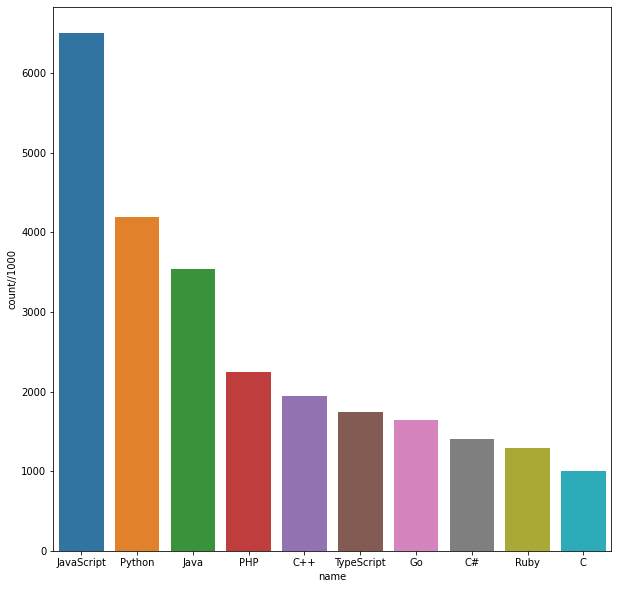

In [11]:
#Absolute Value trends for overall case
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count//1000',data = df)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Issues //1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Seeing the trend based on year for the popular languages

### Absolute Value Trends

In [ ]:
# Absolute value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'count', hue = 'name',data = df2,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Relative Value Trends

In [ ]:
# Relative value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'total', hue = 'name',data = df2,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Key Takeaways: JavaScript has been the most popular language when it comes to Issues feature in GitHub, but, recently Python has overtaken GitHub. TypeScript has also been steadily improving while Ruby and PHP have been declining

# Pull Requests Data Visualization and Analysis

In [ ]:
# Languages vs Pull Requests data
df3 = pd.DataFrame(prs.groupby('name')['count'].sum().nlargest(10))
df3.reset_index(level=0, inplace=True)
df3['count//1000'] = df3['count']//1000
df3

In [ ]:
#Year vs Pull Requests count data
df_year_1 = pd.DataFrame(prs.groupby('year')['count'].sum())
df_year_1.reset_index(level=0, inplace=True)
df_year_1.head()

In [ ]:
# Checking to see if there was a sudden rise in popularity of any one language (only considering 5 every year here to not make it too complicated)
merged = pd.DataFrame() 
for i in [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]:
    rr = pd.DataFrame(issues[prs['year']== i].groupby(['name','year'])['count'].sum().nlargest(5))
    rr.reset_index(level=0, inplace=True)
    merged = pd.concat([merged,rr],axis = 'index')
#merged (commented out to improve readability)

#### No new language popped up here in the top 5 any year other than the languages considered in the top 10. Top 10 per year did have some new entries in some years but count wasnt significant when considering the most popular languages

In [ ]:
# Absolute count and yearwise relative count( count for the language/total count for that year) have been mentioned for top 10 languages
df4 = pd.DataFrame(prs.groupby(['year','name'])['count'].sum())
df4.reset_index(level=[0,1], inplace=True)
lst1 = ['JavaScript','Java','Python','Ruby','PHP','Go','C++','TypeScript','C#','HTML']
total = []
for i in range(len(df_year['year'])):
    for j in df4.loc[df4['year']== df_year_1.loc[i,'year']]['count']:
        total.append(j/df_year_1.loc[i,'count'])
df4['total'] = total
df5 = df4.loc[df4['name'].isin(lst1)]
df5.head(10)

### Seeing the overall trends over 10 years for the popular languages (taking count as count//1000)

In [ ]:
# Absolute value trends overall
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'name', y = 'count//1000',data = df3)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Pull Requsts //1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Seeing the trend based on year for the popular languages

### Absolute Value Trends

In [ ]:
# Absolute value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'count', hue = 'name',data = df5,marker= 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Relative Value Trends

In [ ]:
# Relative value trends yearwise
plt.figure(figsize = (10,10))
ax = plt.subplot(111)
sns.lineplot(x = 'year', y = 'total', hue = 'name',data = df5,marker = 'o')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylabel('Relative Count', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Year', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Key Takeaways: JavaScript has been the most popular language when it comes to Issues feature in GitHub, but, recently Python has overtaken GitHub. TypeScript and Go (maybe even Java can be considered) have also been steadily improving while Ruby and PHP have been declining

# Public Repositories Data Visualization and Analysis

In [ ]:
df9 = pd.DataFrame(repos.head(10))
df9['num_repos//1000'] = df9['num_repos']//1000
df9

In [ ]:
# Absolute Value trend overall
plt.figure(figsize = (10,10))
ax = sns.barplot(x = 'language', y = 'num_repos//1000',data = df9)
ax.bar_label(ax.containers[0])
ax.set_ylabel('No. of Repos // 1000', size = 'large', backgroundcolor = 'yellow',labelpad = 20)
ax.set_xlabel('Language Name', size = 'large',backgroundcolor = 'yellow',labelpad = 20)

### Key Takeaways: The Public Repositories data just tells us about the language vs overall count and so, we cannot say anything about yearwise or recent trends. But, based on this JavaScript,CSS,HTML are the top 3 languages when it comes to PR's

## One Important conclusion about the 2 most popular languages on GitHub( based on the given data): JavaScript has been a very popular language when it comes to Issues and Pull Requests in GitHub but recently Python has overtaken JavaScript.